<h2>Code-Beispiel: Normalengleichung</h2>
<font size="3" face="Verdana">
<p style="text-align:justify">Im folgenden befindet sich eine Implementierung zur Nichtlinearen Ausgleichsrechnung mittels Normalengleichung.</p>
<p style="text-align:justify">Dazu muss jedoch zuerst auch in den ersten Block geklickt werden und dieser durch drücken der "Run" Taste in der Leiste oben ausgeführt werden.</p>
</font>

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt


# Zielfunktion
def function(p, x):
    return p[2] - math.sqrt((p[0]-x[0])**2 + (p[1]-x[1])**2)
    
    
# Partielle Ableitungen der Zielfunktion
def f_par_deriv_z1(p, x):
    return -(p[0]-x[0]) / math.sqrt((p[0]-x[0])**2 + (p[1]-x[1])**2)

def f_par_deriv_z2(p, x):
    return -(p[1]-x[1]) / math.sqrt((p[0]-x[0])**2 + (p[1]-x[1])**2)

def f_par_deriv_R(p,x):
    return 1

nabla_function = [f_par_deriv_z1, f_par_deriv_z2, f_par_deriv_R]


# Berechnen der Jakobi Matrix
def jacobian(p, points, nabla_f):
    rows = np.shape(points)[0] 
    cols = np.shape(p)[0]
    J = np.zeros((rows,cols))
    for row in range(rows):
        for col in range(cols):
            J[row][col] = nabla_f[col](p, points[row])
    return J
    

# Berechnen des Residual
def residual(p, points):
    rows = np.shape(points)[0]
    # Residual Vektor initialisieren
    r = np.zeros(rows)
    for row in range(rows):
        r[row] = function(p, points[row])
    return r


# Parameter wiederholt mit Normalengleichung verbessern
def Iterate(nabla_f, p0, x):
    # Residual und Parameter initialisieren
    r = residual(p0, x)
    p = p0
    
    # Abbruchbedingungen
    MAX_ITER = 1000
    last_r = r
    MIN_DELTA = 0.000001
    EPSILON = 0.000001
    
    i = 0
    while i < MAX_ITER:
        i = i+1
        
        # aktuellen Kreis darstellen
        circle = plt.Circle((p[0], p[1]), radius=p[2], fc='none', ec=[max(0.9-0.05*i, 0), max(0.9-0.05*i, 0), max(0.9-0.05*i, 0)])
        plt.gca().add_patch(circle)
        
        # neue Jakobi Matrix berechnen
        J = jacobian(p, x, nabla_f)
        
        # Delta p berechnen
        JTJ = np.transpose(J).dot(J)
        print(JTJ)
        JTJinv = np.linalg.inv(JTJ)
        JTJinvJT = JTJinv.dot(np.transpose(J))
        
        delta_p = JTJinvJT.dot(r)
        
        # Parameter aktualisieren
        p = p - delta_p
        
        # Residual aktualisieren
        r = residual(p, x)
        
        # Abbruchbedingungen prüfen
        if np.linalg.norm(r) < EPSILON or np.linalg.norm(r - last_r) < MIN_DELTA:
            break
            
        last_r = r
        
    # Parameter und Anzahl der Iterationen zurückgeben
    ret = [p, i]
    return ret


# Funktion um verrauschte Messpunkte zu generieren
def getPoints(x, std, R, z_eins, z_zwei):
    for i in range(np.size(x,0)):
        x[i][1] = (- math.sqrt(R**2 - (z_eins - x[i][0])**2) + z_zwei) + np.random.normal(0, std)     
    return x

<font size="3" face="Verdana">
<p style="text-align:justify">Hier können die Startparameter und Messpunkte im Code (zwischen den Zeilen mit ###...) beliebig geändert werden. Zum Ausführen des Codes muss zunächst in das Feld mit dem Code geklickt werden und dann in der Leiste oben auf "Run".</p>

Messpunkte:
( -1 , 1.936971248356148 )
( 0 , -0.3786924215673895 )
( 2 , -0.8416394007594982 )
( 2.5 , -0.9667441731182815 )
( 3 , -0.5897029176234508 )
( 4 , -0.23975481979784768 )
[[ 1.7998144   0.0082745  -0.99222534]
 [ 0.0082745   4.2001856  -4.64223842]
 [-0.99222534 -4.64223842  6.        ]]
[[ 2.01708199 -0.54162022 -0.34396663]
 [-0.54162022  3.98291801 -4.46948987]
 [-0.34396663 -4.46948987  6.        ]]
[[ 2.0278584  -0.54382842 -0.35391069]
 [-0.54382842  3.9721416  -4.45354701]
 [-0.35391069 -4.45354701  6.        ]]
[[ 2.02732037 -0.54326475 -0.35428601]
 [-0.54326475  3.97267963 -4.45416561]
 [-0.35428601 -4.45416561  6.        ]]
[[ 2.02731477 -0.54325411 -0.35429904]
 [-0.54325411  3.97268523 -4.45417017]
 [-0.35429904 -4.45417017  6.        ]]
Kreis durch die gegebenen Punkte:


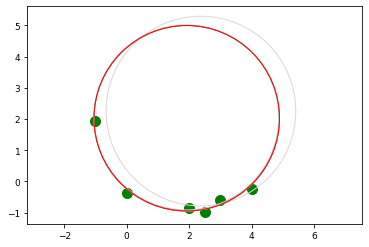

Parameter:
z1:  1.9253396116966306
z2:  2.0244012435262486
R:  2.9693451812629363
Anzahl der Interationen: 5


In [2]:
########################################################################
# Startparameter (z1, z2, R)
p0 = [2.3794, 2.2532, 3.0370]

# Messpunkte: x Werte gegeben, y Werte werden mit get Points berechnet und mit einer Gaußschen Normalverteilung verrauscht
#(0 = kein Rauschen)
# getPoionts(Messpunkte, Standardabweichung, Radius, z1, z2)
# getPoionts([[x1, 0], [x2, 0], [x3, 0], ... , Standardabweichung, Radius, z1, z2)
x = getPoints([[-1, 0], [0, 0], [2, 0], [2.5, 0], [3, 0], [4, 0]], 0.1, 3, 2, 2)

########################################################################

# Messpunkte anzeigen
print("Messpunkte:")
for i in range(np.shape(x)[0]):
    print("(" , x[i][0] , "," , x[i][1] , ")")
for i in range(np.shape(x)[0]):
    plt.scatter(x[i][0], x[i][1], s=100, facecolors='g', edgecolors='g')

# Iteratives Verfahren anwenden
res = Iterate(nabla_function, p0, x)

# den letzten Kreis in rot darstellen
circle = plt.Circle((res[0][0], res[0][1]), radius=res[0][2], fc='none', ec='r')
plt.gca().add_patch(circle)

# Schaubild anzeigen
print("Kreis durch die gegebenen Punkte:")
plt.tick_params(axis='both', which='major', labelsize=9)
plt.ylim(-10, 10)
plt.xlim(-10, 10)
plt.axis('equal')
plt.show()

# Resultate anzeigen
print("Parameter:")
print("z1: ", res[0][0])
print("z2: ", res[0][1])
print("R: ", res[0][2])
print("Anzahl der Interationen:", res[1])